In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [10]:
data = pd.read_csv("task_data.csv", decimal=',')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          37 non-null     int64  
 1   Cardiomegaly                37 non-null     int64  
 2   Heart width                 37 non-null     int64  
 3   Lung width                  37 non-null     int64  
 4   CTR - Cardiothoracic Ratio  37 non-null     float64
 5   xx                          37 non-null     object 
 6   yy                          37 non-null     object 
 7   xy                          37 non-null     object 
 8   normalized_diff             37 non-null     object 
 9   Inscribed circle radius     37 non-null     float64
 10  Polygon Area Ratio          37 non-null     object 
 11  Heart perimeter             37 non-null     float64
 12  Heart area                  37 non-null     int64  
 13  Lung area                   37 non-nu

,ID,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,1,0,172,405,0.424691,1682.3608714590994,3153.671880299657,-638.5311091794423,-0.3042392565074078,68.81860,0.21344605475040257,679.487369,24898,75419
1,2,1,159,391,0.406650,1526.660959877028,5102.159053732461,-889.6784046829048,-0.5393868119084021,73.92564,0.20365244865718798,788.658942,29851,94494
2,5,0,208,400,0.520000,2465.9033921095847,5376.834706657514,-1755.3446985706441,-0.3711626319646625,69.33974,0.32078694801818824,862.322937,33653,66666
3,7,1,226,435,0.519540,2509.0635928775273,6129.821269595383,-1025.0798057957954,-0.4191232704635678,84.14868,0.3175446107949837,906.724959,42018,82596
4,8,1,211,420,0.502381,2368.7701350238644,5441.767074886623,-1493.0400615856156,-0.3934424556563858,73.78347,0.2635421805624075,864.239678,35346,85631


In [20]:
for i in data.columns:
    if(data[i].dtype == "object"):
        data[i] = pd.to_numeric(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          37 non-null     int64  
 1   Cardiomegaly                37 non-null     int64  
 2   Heart width                 37 non-null     int64  
 3   Lung width                  37 non-null     int64  
 4   CTR - Cardiothoracic Ratio  37 non-null     float64
 5   xx                          37 non-null     float64
 6   yy                          37 non-null     float64
 7   xy                          37 non-null     float64
 8   normalized_diff             37 non-null     float64
 9   Inscribed circle radius     37 non-null     float64
 10  Polygon Area Ratio          37 non-null     float64
 11  Heart perimeter             37 non-null     float64
 12  Heart area                  37 non-null     int64  
 13  Lung area                   37 non-nu

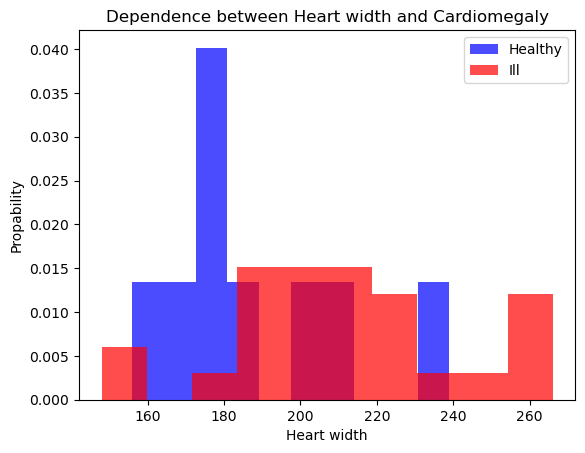

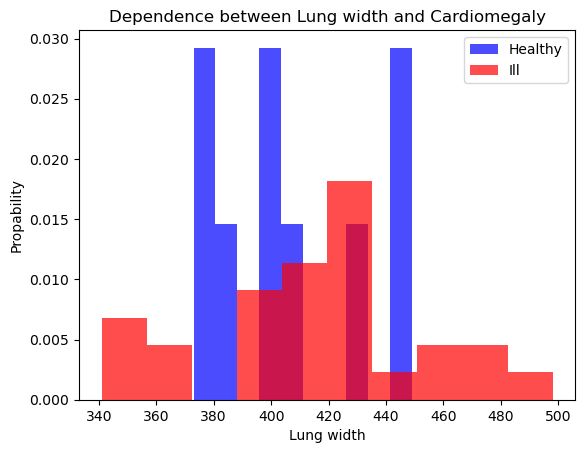

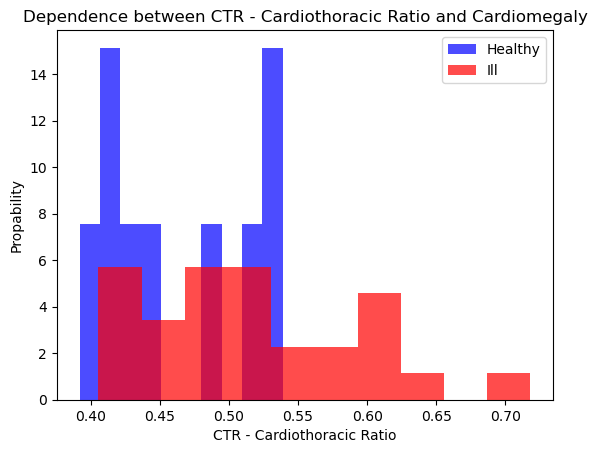

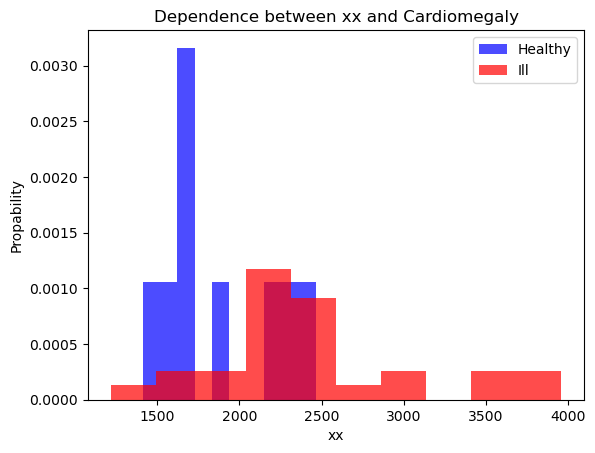

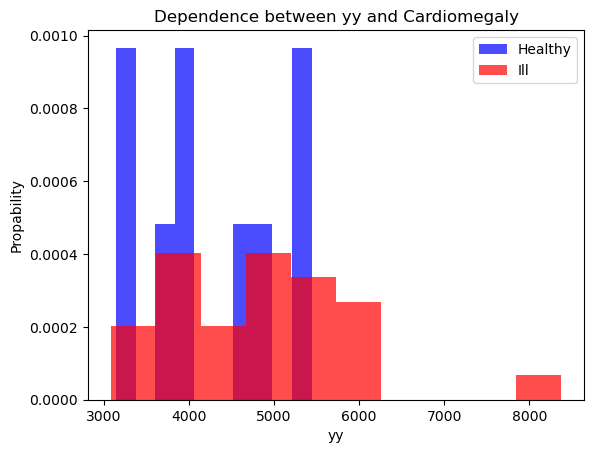

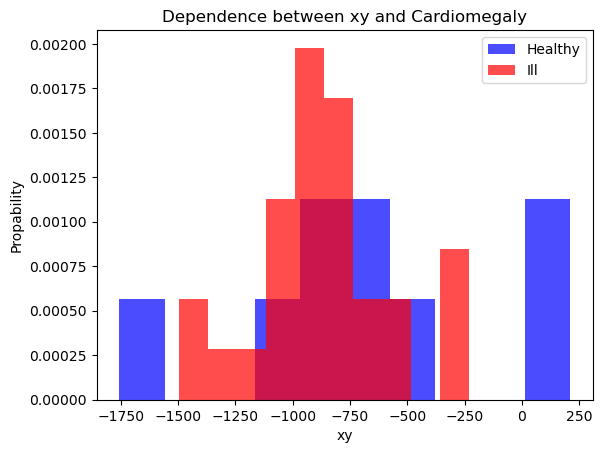

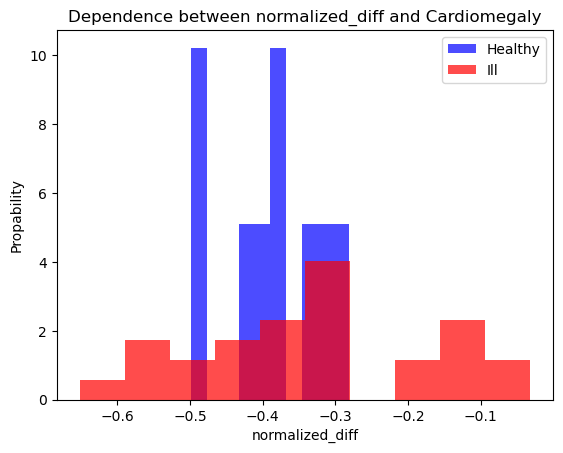

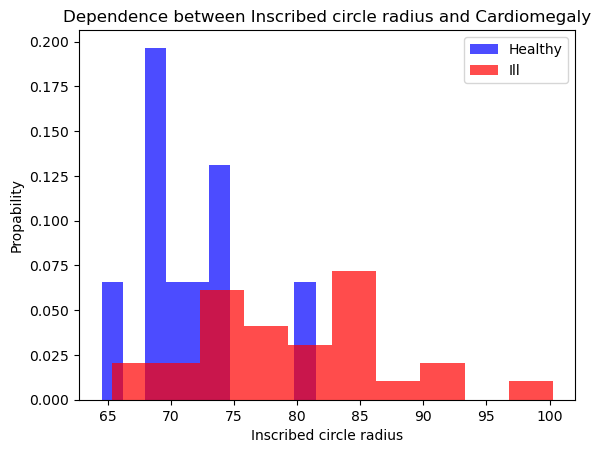

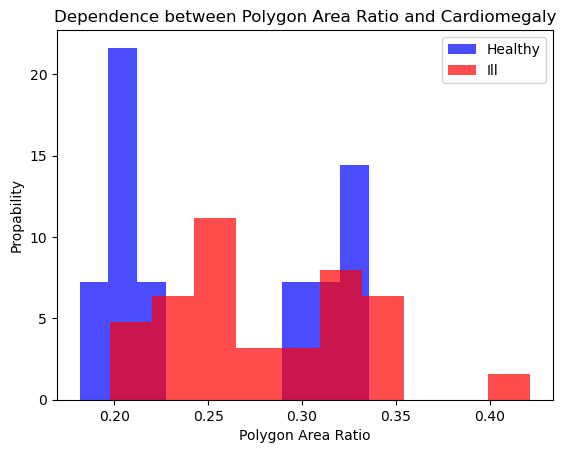

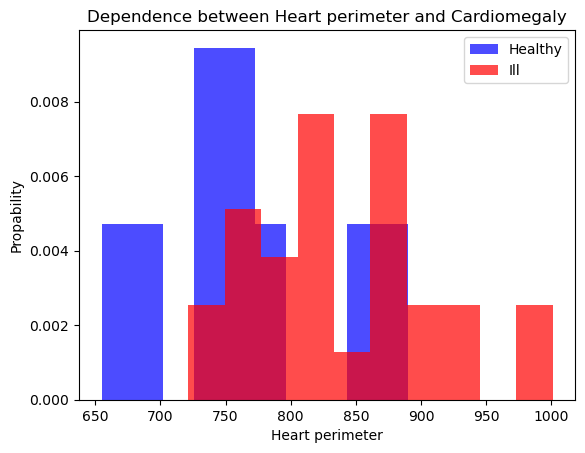

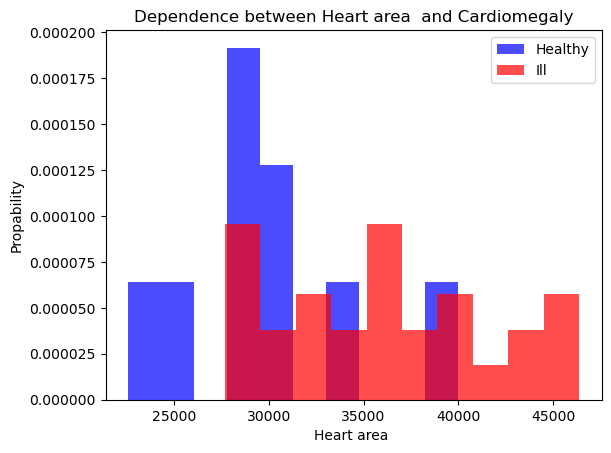

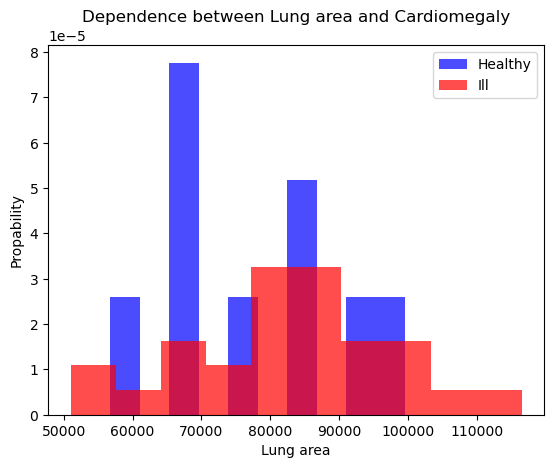

In [25]:
cols = data.columns
features = cols[2:]
target = "Cardiomegaly"
for i in features:
    plt.hist(data[data[target] == 0][i], color = "blue", label="Healthy", alpha=0.7, density=True)
    plt.hist(data[data[target] == 1][i], color = "red", label="Ill", alpha=0.7, density=True)
    plt.title("Dependence between " + i + " and " + target)
    plt.ylabel("Propability")
    plt.xlabel(i)
    plt.legend()
    plt.show()

In [29]:
X = data[features]
y = data[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [30]:

clf = DecisionTreeClassifier(max_depth=4, random_state=65, class_weight="balanced")
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print(f"Dokładność modelu (Accuracy): {accuracy:.2f}")


Dokładność modelu (Accuracy): 0.88


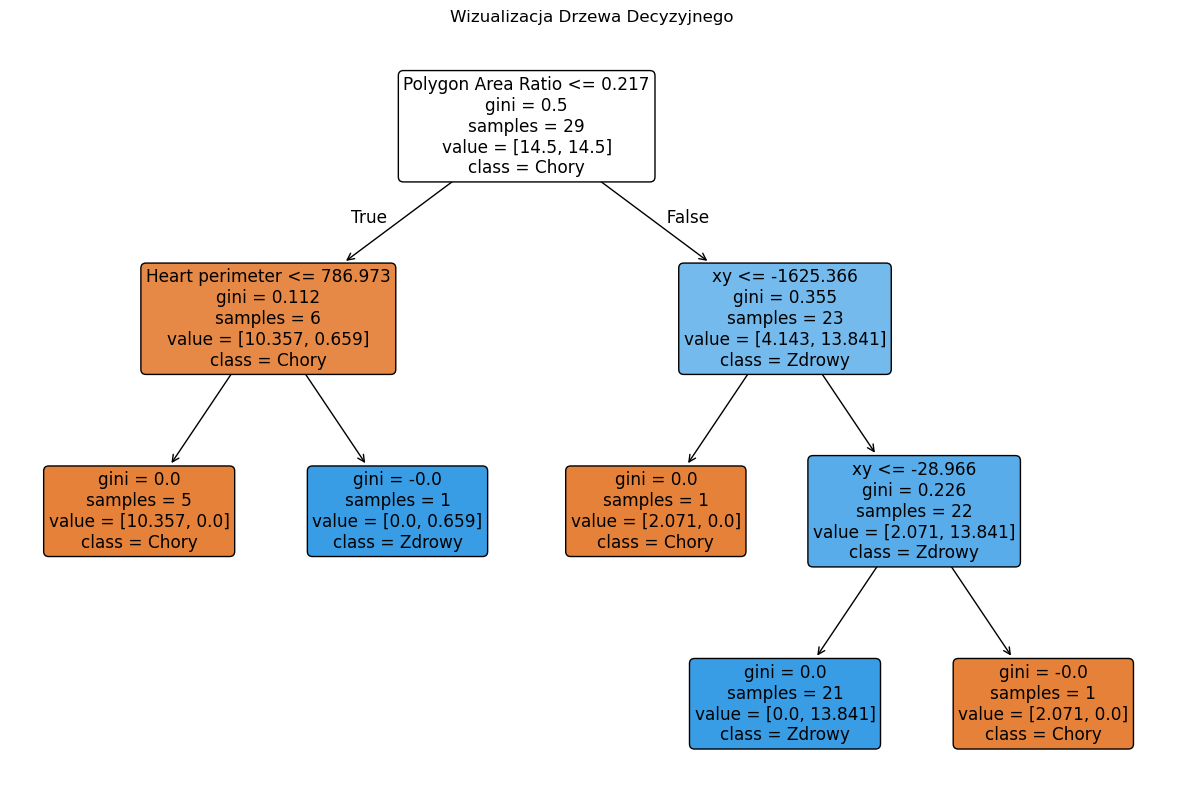

In [31]:
plt.figure(figsize=(15, 10))
class_names = ['Ill', 'Healthy']
# Funkcja plot_tree rysuje nasze drzewo
plot_tree(clf, 
          filled=True, # Wypełnia węzły kolorami
          feature_names= features, # Dodaje nazwy cech
          class_names=class_names, # Dodaje nazwy klas
          rounded=True)

plt.title("Visualization of Decisio")
plt.show()

## 